# <center>  FIFA 19 : Exploratory Data Analysis and Modelling</center>

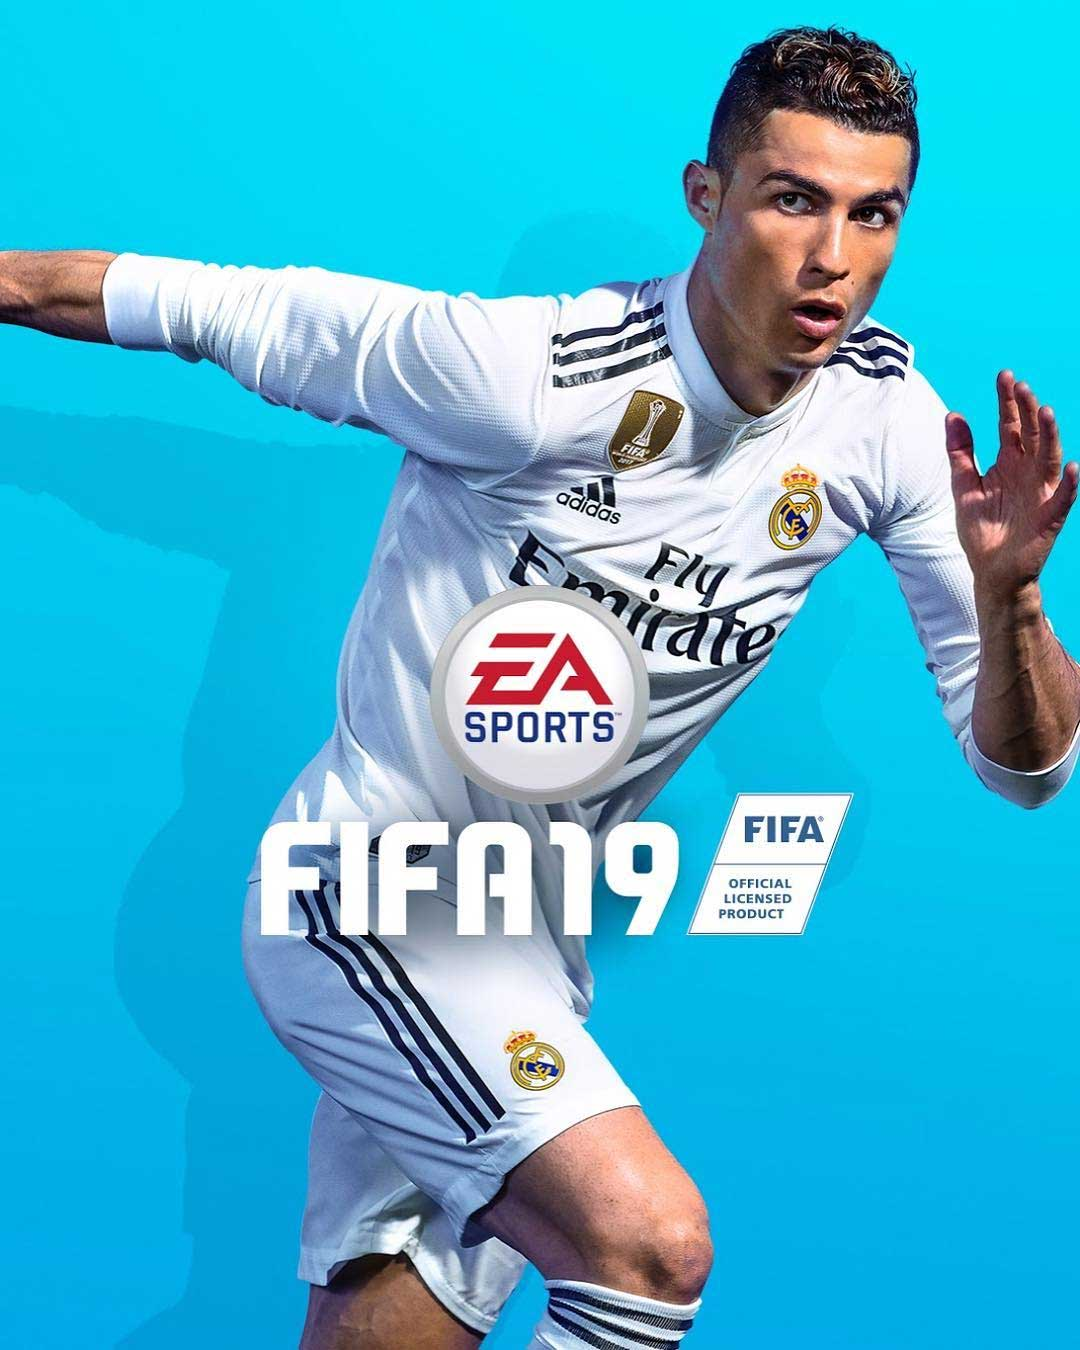

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\rithw\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


# 1. Loading in the Dataset

In [2]:
df = pd.read_csv("D:/OneDrive - Indiana University/Desktop/Kaggle/Kaggle FIFA 19/data.csv")

In [3]:
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

# 2. Cleaning the Dataset

### Removing unncessary columns

In [5]:
# Dropping columns which will not be useful for our exploration

df.drop(['Unnamed: 0', 'Flag', 'Photo', 'Club Logo', 'Special', 'Jersey Number'], axis='columns', inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      17966 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18159 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

### Dealing with Null Values

We can see there are a lot of Null values in our dataset and we will have to deal with null values of each column differently 

#### Club

Simply Replace the players without any club as "Free Agents"

#### *Free Agents*  : 

In professional association football, a free agent is either a player that has been released by a professional association football club and now is no longer affiliated with any league, or a player whose contract with his or her current club has expired and is thus free to join any other club under the terms of the Bosman ruling.

In [7]:
# Null values of Club column

df['Club'].fillna("Free Agents", inplace = True)

#### Preferred Foot

In [8]:
# Preferred Foot

print(df['Preferred Foot'].unique())

df['Preferred Foot'].value_counts()

['Left' 'Right' nan]


Right    13948
Left      4211
Name: Preferred Foot, dtype: int64

Since there are far more number of right footed players than left footed players, we will go by probability and replace NaN values with Right

In [9]:
df['Preferred Foot'].fillna("Right", inplace = True)

#### International Reputation

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 83 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      18207 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18159 non-null  float64
 11  Weak Foot                 18159 non-null  float64
 12  Skill Moves               18159 non-null  float64
 13  Work Rate                 18159 non-null  object 
 14  Body T

We have missing values in the International Reputation Column. Instead of replacing it by zero or by the mean, it makes more sense to replace these values by the grouped by average of the overall.

In [11]:
df['International Reputation'].unique()

array([ 5.,  4.,  3.,  2.,  1., nan])

In [12]:
# Grouping players' International Reputation and Weak Foot by their Overall

gpby_repu_wfoot = pd.DataFrame(df[['International Reputation', 'Weak Foot', 'Overall']].groupby('Overall').mean().round())  

In [13]:
gpby_repu_wfoot

,International Reputation,Weak Foot
Overall,,
46,1.0,3.0
47,1.0,3.0
48,1.0,3.0
49,1.0,3.0
50,1.0,3.0
51,1.0,3.0
52,1.0,3.0
53,1.0,3.0
54,1.0,3.0


In [14]:
# Replacing Nan values with Zero

df["International Reputation"].fillna(0, inplace=True)

In [15]:
# Replacing the International Reputation of these players with the grouped by average of the International Reputation 

df['International Reputation'] = df.apply(lambda row: gpby_repu_wfoot.loc[row['Overall']]['International Reputation'] if row['International Reputation'] == 0 else row['International Reputation'], axis=1)

In [16]:
# Checking to see if any Null Values exist in the International Reputation column

df["International Reputation"].unique()

array([5., 4., 3., 2., 1.])

#### Weak Foot

Similarly for weak foot, we will replace their Weak Foot by Grouped by average

In [17]:
df['Weak Foot'].fillna(0, inplace=True)

In [18]:
gpby_repu_wfoot

,International Reputation,Weak Foot
Overall,,
46,1.0,3.0
47,1.0,3.0
48,1.0,3.0
49,1.0,3.0
50,1.0,3.0
51,1.0,3.0
52,1.0,3.0
53,1.0,3.0
54,1.0,3.0


In [19]:
# Replacing the Weak Foot of these players with the grouped by average of their Weak Foot based on the Key : Overall 

df['Weak Foot'] = df.apply(lambda row: gpby_repu_wfoot.loc[row['Overall']]['Weak Foot'] if row['Weak Foot'] == 0 else row['Weak Foot'], axis =1  )

In [20]:
# Checking to see if any Null Values exist in Weak Foot column

print(df['Weak Foot'].isnull().sum())
print(df['Weak Foot'].unique())

0
[4. 5. 3. 2. 1.]


#### Skill Columns : Crossing, Finishing, Heading Accuracy etc etc

Skill Columns such as Crossing, Finishing, Heading Accuracy will require a different way of dealing with null values.

Instead of just looking at the Overall of the players, it is important to also look at the position in which these players play since these attributes are related to the position as well.

For e.g. Defenders are likely to have a higher rating for Tackling, Marking etc while Strikers are more likely to have a higher rating for Finishing, Composure and Positioning

In [21]:
# Filling the NaNs in the Position column with 'No position' in order to facilitate group by in the next step

df['Position'].fillna('No Position', inplace=True)

In [22]:
# Grouping the Skill Columns by Overall and then Position

groupby_overall_positon = pd.DataFrame(df[['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes','Overall', 'Position']].groupby(['Overall', 'Position']).mean().round())

In [23]:
groupby_overall_positon

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
Overall Position                                                                
46      CM            41.0       34.0             46.0          48.0     30.0   
47      CDM           39.0       36.0             48.0          46.0     26.0   
        CM            35.0       34.0             40.0          51.0     32.0   
        GK            12.0        7.0             12.0          22.0      7.0   
        LB            47.0       26.0             39.0          39.0     27.0   
...                    ...        ...              ...           ...      ...   
91      RCM           90.0       77.0             55.0          92.0     79.0   
        RS            77.0       93.0             77.0          82.0     88.0   
92      LW            79.0       87.0             62.0          84.0     84.0   
94      RF            84.0       95.0             70.0          90.0     86.0   
        ST            84.0       94.0             89.0          81.0     87.0   

                  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  ...  \
Overall Position                                                          ...   
46      CM             43.0   40.0        34.0         44.0         51.0  ...   
47      CDM            44.0   31.0        32.0         46.0         45.0  ...   
        CM             46.0   37.0        36.0         49.0         46.0  ...   
        GK             11.0   13.0        10.0         20.0         14.0  ...   
        LB             45.0   29.0        21.0         41.0         41.0  ...   
...                     ...    ...         ...          ...          ...  ...   
91      RCM            88.0   85.0        80.0         90.0         92.0  ...   
        RS             87.0   86.0        84.0         64.0         90.0  ...   
92      LW             96.0   88.0        87.0         78.0         95.0  ...   
94      RF             97.0   93.0        94.0         87.0         96.0  ...   
        ST             88.0   81.0        76.0         77.0         94.0  ...   

                  Penalties  Composure  Marking  StandingTackle  \
Overall Position                                                  
46      CM             33.0       43.0     40.0            43.0   
47      CDM            33.0       38.0     41.0            41.0   
        CM             40.0       43.0     42.0            44.0   
        GK             15.0       28.0     10.0            10.0   
        LB             29.0       36.0     45.0            42.0   
...                     ...        ...      ...             ...   
91      RCM            80.0       86.0     64.0            67.0   
        RS             85.0       85.0     62.0            45.0   
92      LW             81.0       94.0     27.0            24.0   
94      RF             75.0       96.0     33.0            28.0   
        ST             85.0       95.0     28.0            31.0   

                  SlidingTackle  GKDiving  GKHandling  GKKicking  \
Overall Position                                                   
46      CM                 50.0      10.0        15.0        9.0   
47      CDM                44.0      11.0        11.0        8.0   
        CM                 47.0      11.0        10.0       10.0   
        GK                 12.0      49.0        52.0       55.0   
        LB                 46.0      15.0        13.0        6.0   
...                         ...       ...         ...        ...   
91      RCM                62.0      14.0        11.0        6.0   
        RS                 38.0      27.0        25.0       31.0   
92      LW                 33.0       9.0         9.0       15.0   
94      RF                 26.0       6.0        11.0       15.0   
        ST                 23.0       7.0        11.0       15.0   

                  GKPositioning  GKReflexes  
Overall Position                             
46      CM                 12.0         9.0  
47      CDM    

We will replace the NaNs in the skill columns by the average rating of their Overall and Position which we will get from the group by table above

In [24]:
skill_cols = ['Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes']

In [25]:
# Replacing the NaNs with 0 to make things easy 

for col in skill_cols:
    df[col].fillna(0, inplace=True)

In [26]:
# before actually replacing all skill columns using the group by table we must accomodate for the instances where positions is 'No position' 
# in such cases we will use just the average for Overall  

for i in range(df['Overall'].min(),df['Overall'].max() + 1):
    try:
        groupby_overall_positon.loc[i, 'No Position'] = groupby_overall_positon.loc[i].mean().round()    
    except:
        []

In [27]:
groupby_overall_positon

Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  \
Overall Position                                                                
46      CM            41.0       34.0             46.0          48.0     30.0   
47      CDM           39.0       36.0             48.0          46.0     26.0   
        CM            35.0       34.0             40.0          51.0     32.0   
        GK            12.0        7.0             12.0          22.0      7.0   
        LB            47.0       26.0             39.0          39.0     27.0   
...                    ...        ...              ...           ...      ...   
91      RCM           90.0       77.0             55.0          92.0     79.0   
        RS            77.0       93.0             77.0          82.0     88.0   
92      LW            79.0       87.0             62.0          84.0     84.0   
94      RF            84.0       95.0             70.0          90.0     86.0   
        ST            84.0       94.0             89.0          81.0     87.0   

                  Dribbling  Curve  FKAccuracy  LongPassing  BallControl  ...  \
Overall Position                                                          ...   
46      CM             43.0   40.0        34.0         44.0         51.0  ...   
47      CDM            44.0   31.0        32.0         46.0         45.0  ...   
        CM             46.0   37.0        36.0         49.0         46.0  ...   
        GK             11.0   13.0        10.0         20.0         14.0  ...   
        LB             45.0   29.0        21.0         41.0         41.0  ...   
...                     ...    ...         ...          ...          ...  ...   
91      RCM            88.0   85.0        80.0         90.0         92.0  ...   
        RS             87.0   86.0        84.0         64.0         90.0  ...   
92      LW             96.0   88.0        87.0         78.0         95.0  ...   
94      RF             97.0   93.0        94.0         87.0         96.0  ...   
        ST             88.0   81.0        76.0         77.0         94.0  ...   

                  Composure  Marking  StandingTackle  SlidingTackle  GKDiving  \
Overall Position                                                                
46      CM             43.0     40.0            43.0           50.0      10.0   
47      CDM            38.0     41.0            41.0           44.0      11.0   
        CM             43.0     42.0            44.0           47.0      11.0   
        GK             28.0     10.0            10.0           12.0      49.0   
        LB             36.0     45.0            42.0           46.0      15.0   
...                     ...      ...             ...            ...       ...   
91      RCM            86.0     64.0            67.0           62.0      14.0   
        RS             85.0     62.0            45.0           38.0      27.0   
92      LW             94.0     27.0            24.0           33.0       9.0   
94      RF             96.0     33.0            28.0           26.0       6.0   
        ST             95.0     28.0            31.0           23.0       7.0   

                  GKHandling  GKKicking  GKPositioning  GKReflexes  \
Overall Position                                                     
46      CM              15.0        9.0           12.0         9.0   
47      CDM             11.0        8.0           12.0        13.0   
        CM              10.0       10.0           10.0        11.0   
        GK              52.0       55.0           41.0        46.0   
        LB              13.0        6.0           14.0        12.0   
...                      ...        ...            ...         ...   
91      RCM             11.0        6.0           12.0        11.0   
        RS              25.0       31.0           33.0        37.0   
92      LW               9.0       15.0           15.0        11.0   
94      RF              11.0       15.0           14.0         8.0   
        ST      

In [28]:
# Finally replacing the NaNs in the skill columns by the average rating of their Overall and Position by referring the group by table

for col in skill_cols:
    df[col] = df.apply(lambda row: groupby_overall_positon.loc[row['Overall'],row['Position']][col] if row[col] == 0 else row[col], axis = 1  )

#### Position 

Instead of replacing the Position with the most common predictions, I will try to guess the position of the player based on the rest of the ratings

In [29]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 'No Position'],
      dtype=object)

In [30]:
df[df['Position'] == 'No Position']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
5018,153160,R. Raldes,37,Bolivia,70,70,Free Agents,€0,€0,Right,...,64.0,79.0,70.0,70.0,16.0,8.0,11.0,12.0,13.0,NaN
6736,175393,J. Arce,33,Bolivia,68,68,Free Agents,€0,€0,Left,...,67.0,12.0,34.0,33.0,16.0,13.0,15.0,16.0,8.0,NaN
7922,195905,L. Gutiérrez,33,Bolivia,67,67,Free Agents,€0,€0,Right,...,54.0,72.0,71.0,64.0,11.0,7.0,8.0,12.0,12.0,NaN
9905,226044,R. Vargas,23,Bolivia,66,69,Free Agents,€0,€0,Right,...,64.0,19.0,24.0,23.0,13.0,11.0,11.0,7.0,9.0,NaN
10628,216751,D. Bejarano,26,Bolivia,65,66,Free Agents,€0,€0,Right,...,57.0,68.0,69.0,68.0,14.0,12.0,11.0,14.0,12.0,NaN
13236,177971,J. McNulty,33,Scotland,62,62,Rochdale,€120K,€1K,Right,...,54.0,46.0,46.0,44.0,13.0,12.0,12.0,13.0,13.0,NaN
13237,195380,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,Right,...,54.0,46.0,46.0,44.0,13.0,12.0,12.0,13.0,13.0,NaN
13238,139317,J. Stead,35,England,62,62,Notts County,€140K,€3K,Right,...,54.0,46.0,46.0,44.0,13.0,12.0,12.0,13.0,13.0,NaN
13239,240437,A. Semprini,20,Italy,62,72,Brescia,€425K,€1K,Right,...,54.0,46.0,46.0,44.0,13.0,12.0,12.0,13.0,13.0,NaN
13240,209462,R. Bingham,24,England,62,66,Hamilton Academical FC,€400K,€1K,Right,...,54.0,46.0,46.0,44.0,13.0,12.0,12.0,13.0,13.0,NaN


I will try to categorise all the attributes into 4 major categories : 
    
<ul>
   
<li> Defensive Attributes </li>

    
<li> Midfield Attributes </li>

    
<li> Striker Attributes </li>

    
<li> GoalKeeper Attributes </li>

</ul>


The idea is to take various attributes that would make up these categories and then determine the average of these attributes to get a final Defensive Score, Midfield Score, Attacking Score and Goal Keeping score.


Based on the score which will be maximum, the player is then assigned a particular position. 

For e.g. if the Defensive score of the player is highest among all then they will be assigned a position : 'CB'

For Defensive Score, the attributes chosen are:
    
<ul>
   
<li> Marking </li>

    
<li> Standing Tackle </li>

    
<li> Sliding Tackle </li>

    
<li> Heading Accuracy </li>
    

<li> Interceptions </li>

</ul>    

For Midfield Score, the attributes chosen are:
    
<ul>
   
<li> Short Passing </li>

    
<li> Long Passing </li>

    
<li> Dribbling </li>

    
<li> Curve </li>
    

<li> Ball Control </li>

    
<li> Crossing </li>


<li> Vision </li>
    
    
</ul>    

For Striker Score, the attributes chosen are:
    
<ul>
   
<li> Volleys </li>

    
<li> Finishing </li>

    
<li> Positioning </li>

    
<li> Compure </li>    
    
</ul>    

For Goalkeeper Score, the attributes chosen are:
    
<ul>
   
<li> GKDiving </li>

    
<li> GKReflexes </li>

    
<li> GKPositioning </li>

    
<li> GKKicking </li>
    

<li> GKHandling </li>

</ul>    

#### The Idea is to replicate something similar with the existing database:-

Hence, I will further categorise all the attributes into these many categories

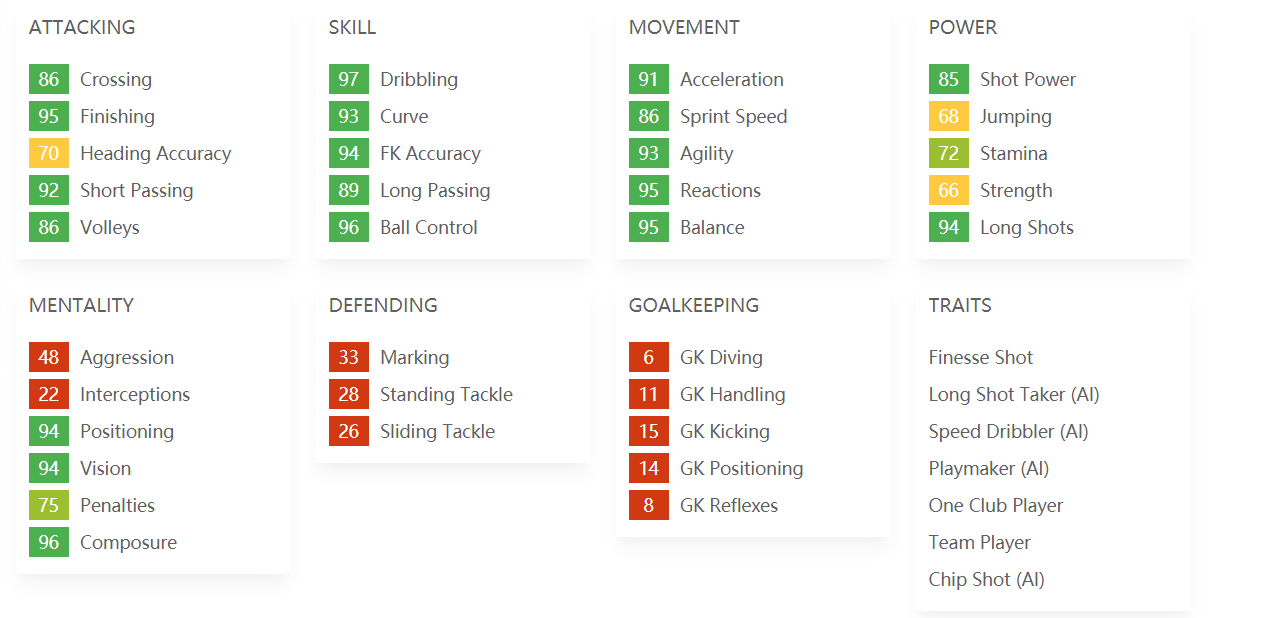

In [31]:
# Calculating average position wise Attributes to determine the position of the player

df['defensive_score'] = (df['Marking'] + df['StandingTackle'] + df['SlidingTackle'] + df['HeadingAccuracy'] + df['Interceptions'])/5

df['midfield_score'] = (df['ShortPassing'] + df['Dribbling'] + df['Curve'] + df['LongPassing'] + df['BallControl'] + df['Crossing'] + df['Vision'])/7

df['striker_score'] = (df['Volleys'] + df['Finishing'] + df['Positioning'] + df['Composure']) / 4

df['goalkeeper_score']= (df['GKDiving'] + df['GKHandling'] + df['GKKicking'] + df['GKPositioning'] + df['GKReflexes']) / 5


# Referenced from Sofifa : https://sofifa.com/

df['Movement_Attributes'] = (df['Acceleration'] + df['SprintSpeed'] + df['Reactions'] + df['Balance'] + df['Agility']) / 5

df['Power_Attributes'] = (df['Strength'] + df['Jumping'] + df['ShotPower'] + df['Stamina'] + df['LongShots']) / 5

df['Mentality_Attributes'] = (df['Aggression'] + df['Interceptions'] + df['Vision'] + df['Positioning'] + df['Penalties'] + df['Composure']) / 6

df['Skill_Attributes'] =  (df['Dribbling'] + df['Curve'] + df['FKAccuracy'] + df['LongPassing'] + df['BallControl']) / 5


In [32]:
# Rounding the above calculated new columns

df['defensive_score'] = df['defensive_score'].round()
df['midfield_score'] = df['midfield_score'].round()
df['striker_score'] = df['striker_score'].round()
df['Skill_Attributes'] = df['Skill_Attributes'].round()
df['Movement_Attributes'] = df['Movement_Attributes'].round()
df['Mentality_Attributes'] = df['Mentality_Attributes'].round()
df['Power_Attributes'] = df['Power_Attributes'].round()
df['goalkeeper_score'] = df['goalkeeper_score'].round()

In [33]:
df[df['Position'] == 'No Position']

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKReflexes,Release Clause,defensive_score,midfield_score,striker_score,goalkeeper_score,Movement_Attributes,Power_Attributes,Mentality_Attributes,Skill_Attributes
5018,153160,R. Raldes,37,Bolivia,70,70,Free Agents,€0,€0,Right,...,13.0,NaN,71.0,42.0,36.0,12.0,55.0,61.0,59.0,43.0
6736,175393,J. Arce,33,Bolivia,68,68,Free Agents,€0,€0,Left,...,8.0,NaN,36.0,60.0,65.0,14.0,71.0,60.0,58.0,53.0
7922,195905,L. Gutiérrez,33,Bolivia,67,67,Free Agents,€0,€0,Right,...,12.0,NaN,66.0,44.0,45.0,10.0,64.0,65.0,55.0,43.0
9905,226044,R. Vargas,23,Bolivia,66,69,Free Agents,€0,€0,Right,...,9.0,NaN,27.0,60.0,67.0,10.0,75.0,62.0,50.0,59.0
10628,216751,D. Bejarano,26,Bolivia,65,66,Free Agents,€0,€0,Right,...,12.0,NaN,62.0,54.0,44.0,13.0,65.0,43.0,48.0,48.0
13236,177971,J. McNulty,33,Scotland,62,62,Rochdale,€120K,€1K,Right,...,13.0,NaN,46.0,53.0,48.0,13.0,65.0,58.0,50.0,50.0
13237,195380,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,Right,...,13.0,NaN,46.0,53.0,48.0,13.0,65.0,58.0,50.0,50.0
13238,139317,J. Stead,35,England,62,62,Notts County,€140K,€3K,Right,...,13.0,NaN,46.0,53.0,48.0,13.0,65.0,58.0,50.0,50.0
13239,240437,A. Semprini,20,Italy,62,72,Brescia,€425K,€1K,Right,...,13.0,NaN,46.0,53.0,48.0,13.0,65.0,58.0,50.0,50.0
13240,209462,R. Bingham,24,England,62,66,Hamilton Academical FC,€400K,€1K,Right,...,13.0,NaN,46.0,53.0,48.0,13.0,65.0,58.0,50.0,50.0


In [34]:
df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB', 'No Position'],
      dtype=object)

In [35]:
# Defining a function that would return the position based on the 4 scores defined

def define_position(row):
    max_attr = max(row['defensive_score'], row['midfield_score'], row['striker_score'], row['goalkeeper_score'])
    if max_attr == row['goalkeeper_score']:
        return 'GK'
    elif max_attr == row['defensive_score']:
        return 'CB'
    elif max_attr == row['midfield_score']:
        return 'CM'
    elif max_attr == row['striker_score']:
        return 'CF'    

In [36]:
# Applying the function

df['Position'] = df.apply(lambda row: define_position(row) if row['Position']=='No Position' else row['Position'], axis = 1)

In [37]:
# Checking to see if the Position column has been cleaned

df['Position'].unique()

array(['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
       'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB'], dtype=object)

#### Skill Moves

We will clean the *Skill Moves* column in a similar manner to the *International Reputation* column except instead of using *Overall*, we will use *Position* as the metricof grouping

In [38]:
# Grouping the Skill Moves based on the position

grpby_skill_moves = df[['Skill Moves', 'Position']].groupby('Position').mean().round()

In [39]:
# Replacing NaNs with 0 for ease of replacement

df['Skill Moves'].fillna(0, inplace=True)

In [40]:
grpby_skill_moves

,Skill Moves
Position,
CAM,3.0
CB,2.0
CDM,2.0
CF,3.0
CM,3.0
GK,1.0
LAM,3.0
LB,2.0
LCB,2.0


In [41]:
# Replacing the skill moves with the group by average

df['Skill Moves'] = df.apply(lambda row: grpby_skill_moves.loc[row['Position']]['Skill Moves'] if row['Skill Moves'] == 0 else row['Skill Moves'], axis =1)

#### Work Rate

Simply replacing the NaNs in the Work Rate column by the most frequent occurence

In [42]:
df['Work Rate'].value_counts()

Medium/ Medium    9810
High/ Medium      3173
Medium/ High      1690
High/ High        1015
Medium/ Low        850
High/ Low          699
Low/ Medium        449
Low/ High          439
Low/ Low            34
Name: Work Rate, dtype: int64

In [43]:
df['Work Rate'].fillna("Medium/ Medium", inplace = True)

#### Body Type

In [44]:
# Checking the different unique values in the *Body Type* column

df['Body Type'].unique()

array(['Messi', 'C. Ronaldo', 'Neymar', 'Lean', 'Normal', 'Courtois',
       'Stocky', 'PLAYER_BODY_TYPE_25', 'Shaqiri', 'Akinfenwa', nan],
      dtype=object)

In [45]:
df['Body Type'].value_counts()

Normal                 10595
Lean                    6417
Stocky                  1140
Akinfenwa                  1
C. Ronaldo                 1
PLAYER_BODY_TYPE_25        1
Messi                      1
Shaqiri                    1
Courtois                   1
Neymar                     1
Name: Body Type, dtype: int64

Some of the Players in the FIFA database have a unique body type. Players with a unique body type have a different feel when you control these players.

Messi has a unique body type and he feels much stronger and compact on the ball than most small players again with similar dribbling and physical ability.

In [46]:
# Using Sofifa : https://sofifa.com/ to refer the body type of the players

# Seperating the Unique body types in a separate category : *Unique*

df['Body Type'][df['Body Type'] == "C. Ronaldo"] = "Unique"
df['Body Type'][df['Body Type'] == "Neymar"] = "Unique"
df['Body Type'][df['Body Type'] == "PLAYER_BODY_TYPE_25"] = "Unique"
df['Body Type'][df['Body Type'] == "Messi"] = "Unique"
df['Body Type'][df['Body Type'] == "Akinfenwa"] = "Unique"
df['Body Type'][df['Body Type'] == "Courtois"] = "Unique"
df['Body Type'][df['Body Type'] == "Shaqiri"] = "Unique"

C:\Users\rithw\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\rithw\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\rithw\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\rithw\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCo

In [47]:
df[df['Body Type'] == "Unique"]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKReflexes,Release Clause,defensive_score,midfield_score,striker_score,goalkeeper_score,Movement_Attributes,Power_Attributes,Mentality_Attributes,Skill_Attributes
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,€110.5M,€565K,Left,...,8.0,€226.5M,36.0,92.0,93.0,11.0,92.0,76.0,72.0,93.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,€77M,€405K,Right,...,11.0,€127.1M,40.0,84.0,93.0,12.0,87.0,90.0,75.0,83.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,€118.5M,€290K,Right,...,11.0,€228.1M,36.0,87.0,88.0,12.0,92.0,71.0,74.0,89.0
19,192119,T. Courtois,26,Belgium,89,90,Real Madrid,€53.5M,€240K,Left,...,88.0,€113.7M,16.0,26.0,26.0,84.0,58.0,46.0,31.0,22.0
26,209331,M. Salah,26,Egypt,88,89,Liverpool,€69.5M,€255K,Left,...,14.0,€137.3M,47.0,82.0,86.0,12.0,91.0,76.0,74.0,78.0
370,193348,X. Shaqiri,26,Switzerland,81,81,Liverpool,€19M,€130K,Left,...,11.0,€36.1M,46.0,83.0,76.0,12.0,83.0,74.0,70.0,84.0
9501,156321,A. Akinfenwa,36,England,66,66,Wycombe Wanderers,€230K,€2K,Right,...,16.0,€403K,36.0,54.0,66.0,12.0,51.0,69.0,59.0,52.0


In [48]:
# Replacing the NaNs with the most frequent occurence i.e. 'Normal'

df['Body Type'].fillna('Normal', inplace=True)

In [49]:
# Checking to see if the column *Body Type* has been cleaned

df['Body Type'].unique()

array(['Unique', 'Lean', 'Normal', 'Stocky'], dtype=object)

#### Real Face

In [50]:
df['Real Face'].value_counts()

No     16505
Yes     1654
Name: Real Face, dtype: int64

In [51]:
# Replacing the NaNs with the most frequent occurence i.e. 'No'


df['Real Face'].fillna('No', inplace=True)

#### Height

In [52]:
df['Height'].isnull().sum()

48

In [53]:
df[['Height', 'Weight']][df['Height'].isna()]

,Height,Weight
13236,NaN,NaN
13237,NaN,NaN
13238,NaN,NaN
13239,NaN,NaN
13240,NaN,NaN
13241,NaN,NaN
13242,NaN,NaN
13243,NaN,NaN
13244,NaN,NaN
13245,NaN,NaN


The logical thing to replace Height would be to use Weight but we can see that for all the NaN entries, both Height and Weight are not available 

Hence, the next idea is to replace the Height and using the Nationality and the Position in which the players play

In [54]:
df['Height'].head()

0     5'7
1     6'2
2     5'9
3     6'4
4    5'11
Name: Height, dtype: object

But we can see that the Height is in Feet, hence it is important to clean that first in order to apply Group By later

In [55]:
def clean_height(x):
    l=[]
    s=1
    if isinstance(x,str):
        l=x.split("'")
        i=int(l[0])
        j=int(l[1])
        s=((i*12)+j)/12
    return(s)


df['Height'] = df['Height'].apply(clean_height)

In [56]:
df["Height"].head()

0    5.583333
1    6.166667
2    5.750000
3    6.333333
4    5.916667
Name: Height, dtype: float64

In [57]:
groupby_nation_position = pd.DataFrame(df[['Height', 'Nationality','Position']].groupby(['Nationality', 'Position']).mean())

In [58]:
groupby_nation_position

Height
Nationality Position          
Afghanistan CAM       5.666667
            CM        5.833333
            LB        5.750000
            LM        5.666667
Albania     CAM       5.791667
...                        ...
Zimbabwe    LW        5.583333
            RB        6.166667
            RCM       5.833333
            RS        5.583333
            ST        5.888889

[1799 rows x 1 columns]

In [59]:
df['Height'].fillna(1, inplace = True)

In [60]:
# Replacing the NaN values in the height column using the groupby table

df['Height'] = df.apply(lambda row: groupby_nation_position.loc[row['Nationality'],row['Position']]['Height'] if row['Height'] == 1 else row['Height'], axis=1)

In [61]:
# Checking to see if Height column has been cleaned

df[df['Height'] == 1]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKReflexes,Release Clause,defensive_score,midfield_score,striker_score,goalkeeper_score,Movement_Attributes,Power_Attributes,Mentality_Attributes,Skill_Attributes
13237,195380,J. Barrera,29,Nicaragua,62,62,Boyacá Chicó FC,€300K,€1K,Right,...,13.0,NaN,46.0,53.0,48.0,13.0,65.0,58.0,50.0,50.0
13273,242237,B. Lepistu,25,Estonia,62,67,Kristiansund BK,€400K,€1K,Right,...,13.0,NaN,46.0,53.0,48.0,13.0,65.0,58.0,50.0,50.0


Looks like there are two players whose Height is still 1. It is probably due to the fact that these nationality, height pairs don't have an entry in the group by table.

Hence, I will simply replace them by the average height in that particular position

In [62]:
groupby_position_height = pd.DataFrame(df[['Height', 'Position']].groupby([ 'Position']).mean())

In [63]:
df['Position'][df['Height'] == 1]

13237    CM
13273    CM
Name: Position, dtype: object

In [64]:
df['Height'] = df.apply(lambda row: groupby_position_height.loc[row['Position']]['Height'] if row['Height'] == 1 else row['Height'], axis=1)

In [65]:
# Checking to see if Height column has been cleaned

df[df['Height'] == 1]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKReflexes,Release Clause,defensive_score,midfield_score,striker_score,goalkeeper_score,Movement_Attributes,Power_Attributes,Mentality_Attributes,Skill_Attributes


#### Weight

In [66]:
df['Weight']

0        159lbs
1        183lbs
2        150lbs
3        168lbs
4        154lbs
          ...  
18202    134lbs
18203    170lbs
18204    148lbs
18205    154lbs
18206    176lbs
Name: Weight, Length: 18207, dtype: object

In [67]:
# Converting the string column to Float 

def clean_weight(x):
    
    if isinstance(x,str):
        return(x.replace('lbs', ''))
    return(x)

df['Weight'] = df['Weight'].apply(clean_weight).astype('float')

In [68]:
df[['International Reputation','Position', "Nationality", "Height"]][df['Weight'].isna()]

,International Reputation,Position,Nationality,Height
13236,1.0,CM,Scotland,5.460648
13237,1.0,CM,Nicaragua,5.850819
13238,1.0,CM,England,5.730100
13239,1.0,CM,Italy,5.770609
13240,1.0,CM,England,5.730100
13241,1.0,CM,Poland,5.277778
13242,1.0,CM,Argentina,5.705674
13243,1.0,CM,England,5.730100
13244,1.0,CM,Denmark,5.776961
13245,1.0,CM,Brazil,5.391667


#### Position Columns

In [69]:
pos_columns = ['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
       'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
       'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB']

In [70]:
df['LS'].head()

0    88+2
1    91+3
2    84+3
3     NaN
4    82+3
Name: LS, dtype: object

The values are in String Format hence some cleaning is required to convert them into integer values

In [71]:
def PosConverter(val):
    if type(val) == str:
        s1 = val[0:2]
        s2 = val[-1]
        val = int(s1) + int(s2)
        return val
    else:
        return val

for col in pos_columns:
    df[col] = df[col].apply(PosConverter)

In [72]:
# # Creating a groupby table to replace the Pos_Columns values

# groupby_pos = pd.DataFrame(df[['LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM',
#        'RAM', 'LM', 'LCM', 'CM', 'RCM', 'RM', 'LWB', 'LDM', 'CDM', 'RDM',
#        'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'Overall', 'Position']].groupby(['Overall','Position']).mean().round())

In [73]:
# # Replacing NaNs with 1 for ease of replacement later 

# for col in pos_columns:
#     df[col].fillna(1, inplace=True)

In [74]:
# # Finally replacing the NaNs in the Pos columns by the average rating of their Overall and Position by referring the group by table

# for col in pos_columns:
#     df[col] = df.apply(lambda row: groupby_pos.loc[row['Overall'],row['Position']][col] if row[col] == 1 else row[col], axis = 1  )

In [75]:
df['LS'].isnull().sum()

2085

In [76]:
df[pos_columns][df['LS'].isna()]

,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,...,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18178,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18183,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Joined

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 91 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      18207 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Weak Foot                 18207 non-null  float64
 12  Skill Moves               18207 non-null  float64
 13  Work Rate                 18207 non-null  object 
 14  Body T

In [78]:
df[df['Joined'].isna()]

,ID,Name,Age,Nationality,Overall,Potential,Club,Value,Wage,Preferred Foot,...,GKReflexes,Release Clause,defensive_score,midfield_score,striker_score,goalkeeper_score,Movement_Attributes,Power_Attributes,Mentality_Attributes,Skill_Attributes
28,198710,J. Rodríguez,26,Colombia,88,89,FC Bayern München,€69.5M,€315K,Left,...,14.0,NaN,51.0,88.0,85.0,13.0,77.0,74.0,76.0,87.0
38,167664,G. Higuaín,30,Argentina,88,88,Milan,€57M,€245K,Right,...,10.0,NaN,35.0,74.0,90.0,8.0,75.0,80.0,65.0,73.0
91,187961,Paulinho,29,Brazil,85,85,Guangzhou Evergrande Taobao FC,€37M,€235K,Right,...,8.0,NaN,79.0,77.0,80.0,11.0,73.0,85.0,79.0,77.0
166,212523,Anderson Talisca,24,Brazil,83,90,Guangzhou Evergrande Taobao FC,€36.5M,€18K,Left,...,10.0,NaN,59.0,82.0,79.0,12.0,75.0,76.0,73.0,84.0
176,207410,M. Kovačić,24,Croatia,83,89,Chelsea,€35M,€165K,Right,...,7.0,NaN,65.0,84.0,70.0,7.0,79.0,73.0,74.0,81.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17978,225468,M. Bloomfield,21,England,51,57,Hamilton Academical FC,€50K,€3K,Right,...,14.0,NaN,20.0,41.0,47.0,13.0,62.0,51.0,42.0,39.0
17979,241341,Zhang Yuan,21,China PR,51,60,Guizhou Hengfeng FC,€60K,€2K,Right,...,9.0,NaN,45.0,47.0,40.0,11.0,67.0,54.0,46.0,45.0
18026,241444,Chen Ji,21,China PR,50,59,Guizhou Hengfeng FC,€50K,€2K,Right,...,7.0,NaN,49.0,48.0,32.0,11.0,68.0,48.0,45.0,46.0
18031,243506,Zhou Xin,20,China PR,50,61,Stabæk Fotball,€40K,€2K,Right,...,6.0,NaN,47.0,37.0,32.0,9.0,61.0,44.0,43.0,34.0


A loan involves a particular player being able to temporarily play for a club other than the one to which they are currently contracted. Loan deals may last from a few weeks to a full season, sometimes persisting for multiple seasons at a time. Players may be loaned out to other clubs for several reasons.

Hence whenever a player is loaned in, he/she playes for that particular team on a temporary basis. Hence they have no Joined date 

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 91 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        18207 non-null  int64  
 1   Name                      18207 non-null  object 
 2   Age                       18207 non-null  int64  
 3   Nationality               18207 non-null  object 
 4   Overall                   18207 non-null  int64  
 5   Potential                 18207 non-null  int64  
 6   Club                      18207 non-null  object 
 7   Value                     18207 non-null  object 
 8   Wage                      18207 non-null  object 
 9   Preferred Foot            18207 non-null  object 
 10  International Reputation  18207 non-null  float64
 11  Weak Foot                 18207 non-null  float64
 12  Skill Moves               18207 non-null  float64
 13  Work Rate                 18207 non-null  object 
 14  Body T